In [1]:
##.. Modified by CHUYAN at Dec.24/25th, try to add a new function: 'fitLRM2' into 'calc_LRM_metrics',to split data & model into 4 different Cloud regimes:
#.. Colder& 'up' region; Warmer& 'up' region; Cold &'downward motion' region; Warmer& 'downward motion' region..


import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
import PyNIO as Nio
import pandas as pd
import glob
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod
from get_LWPCMIP6data import *
from get_annual_so import *
from calc_LRM_metrics import *
from fitLRM_cy import *
from run_simple_cmip6 import *
from calc_slope import *


In [2]:
deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

if (exp=='piControl')|(exp=='amip'):

    MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGem3', dont have 'wap' variable in 'pi-Control' exp
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper

CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}#


GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}# missing lots of Variables
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' don't have 'Amon' typevar
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#  abrupt4x exper doesnt have 'ps' variable in r1i1p1f1
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# missing a lot of variables and typevars
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}# time doesnt corresponding, lose a lot of files for different variables in both exper
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'tas' variable
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operate

#ECEV has very discrete year in 'abrupt-4xCO2', semms continued but each in one yr file in 'piControl'
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# '/glade/' dont have 'Amon' typever in 'abru4x'


deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]

output_ARRAY = {}
output_intermedia = {}
output_GMT =  {}
output_predict  = {}
output_report   = {}

output_LRM_sstlt_up = {}
output_LRM_sstle_up = {}
output_LRM_sstlt_down = {}
output_LRM_sstle_down = {}
output_dict0_PI =  {}
output_dict0_abr = {}
shape_yr_modelPI =  {}
shape_yr_modelabr = {}

TR_sst  =  276.15
TR_sub  =  0.0

for i in range(len(deck)):
    
    output_ARRAY[deck_nas[i]] =  load(deck[i]['modn']+'_'+str(TR_sst)+'K_ '+'ud'+str(TR_sub)+'_dats.npz', allow_pickle=True)  # +str(TR_sub) 
    output_intermedia[deck_nas[i]]  = output_ARRAY[deck_nas[i]]['rawdata_dict']
    
    output_GMT[deck_nas[i]]  =   output_intermedia[deck_nas[i]][()]['GMT']
    output_predict[deck_nas[i]]  =   output_intermedia[deck_nas[i]][()]['predict_lwp']
    output_report[deck_nas[i]]  =   output_intermedia[deck_nas[i]][()]['report_lwp']
    
    output_LRM_sstlt_up[deck_nas[i]] =  output_intermedia[deck_nas[i]][()]['LRM_sstlt_up']
    output_LRM_sstle_up[deck_nas[i]] =  output_intermedia[deck_nas[i]][()]['LRM_sstle_up']
    output_LRM_sstlt_down[deck_nas[i]] =  output_intermedia[deck_nas[i]][()]['LRM_sstlt_down']
    output_LRM_sstle_down[deck_nas[i]] =  output_intermedia[deck_nas[i]][()]['LRM_sstle_down']
    
    output_dict0_PI[deck_nas[i]]  =   output_intermedia[deck_nas[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas[i]]  =   output_intermedia[deck_nas[i]][()]['dict0_abr_var']
    shape_yr_modelPI[deck_nas[i]]   =  output_dict0_PI[deck_nas[i]]['shape_yr']
    shape_yr_modelabr[deck_nas[i]]   =  output_dict0_abr[deck_nas[i]]['shape_yr']

print(shape_yr_modelPI, shape_yr_modelabr)

{'BCCESM1': 99, 'CanESM5': 99, 'CESM2': 99, 'CESM2FV2': 99, 'CESM2WACCM': 99, 'CNRMESM2': 99, 'GISSE21G': 99, 'GISSE21H': 99, 'IPSLCM6ALR': 99, 'MRIESM20': 99, 'MIROC6': 99, 'SAM0': 99} {'BCCESM1': 150, 'CanESM5': 150, 'CESM2': 150, 'CESM2FV2': 150, 'CESM2WACCM': 150, 'CNRMESM2': 150, 'GISSE21G': 150, 'GISSE21H': 150, 'IPSLCM6ALR': 150, 'MRIESM20': 150, 'MIROC6': 150, 'SAM0': 150}


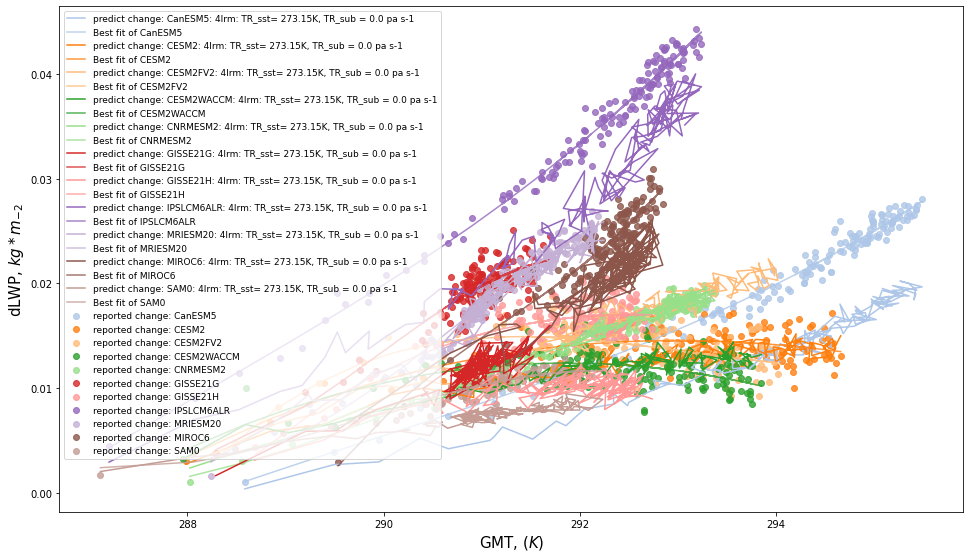

In [4]:
#.. abrupt +piC  Plot:

fig3, ax5  = plt.subplots(1, 1, figsize =(16.2, 9.3))  #(16.2, 9.3))
#ax3  = plt.axes()


# These are the colors that will be used in the plot
'''
ax5.set_prop_cycle(color=[
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5'])
'''
my_colors= array([
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors

output_dabrmeanpi_report = {}
output_dabrmeanpi_predict = {}

output_yrs = {}

for a in range(len(deck)):
    output_yrs[deck_nas[a]]  = arange(shape_yr_modelPI[deck_nas[a]]+shape_yr_modelabr[deck_nas[a]])
    
    #if deck_nas[a]=='CESM2'or deck_nas[a]=='CESM2FV2' or deck_nas[a]=='CESM2WACCM':   #..BCCESM1
    #..if deck_nas[a] == 'CESM2':   #..BCCESM1
    if deck_nas[a]!= 'BCCESM1':
        output_dabrmeanpi_report[deck_nas[a]] = output_report[deck_nas[a]][shape_yr_modelPI[deck_nas[a]]:] - mean(output_report[deck_nas[a]][0:shape_yr_modelPI[deck_nas[a]]])
        output_dabrmeanpi_predict[deck_nas[a]] = output_predict[deck_nas[a]][shape_yr_modelPI[deck_nas[a]]:] - mean(output_predict[deck_nas[a]][0:shape_yr_modelPI[deck_nas[a]]])
        
        ax5.scatter(output_GMT[deck_nas[a]][shape_yr_modelPI[deck_nas[a]]:shape_yr_modelPI[deck_nas[a]]+149], output_dabrmeanpi_report[deck_nas[a]][0:149], label='reported change: '+deck_nas[a], alpha =0.8, c= my_colors[a])   #  +': 4lrm: TR_sst= 0.0K, TR_sub = 0.0'
        ax5.plot(output_GMT[deck_nas[a]][shape_yr_modelPI[deck_nas[a]]:shape_yr_modelPI[deck_nas[a]]+149], output_dabrmeanpi_predict[deck_nas[a]][0:149], label='predict change: '+deck_nas[a]+': 4lrm: TR_sst= 273.15K, TR_sub = 0.0 pa s-1', alpha = 1.0, c = my_colors[a])
        
        #plt.scatter(output_GMT[deck_nas[a]][0: 248], output_report[deck_nas[a]][0: 248], label='reported LWP: ' + deck_nas[a])
        #plt.plot(output_GMT[deck_nas[a]][0: 248], output_predict[deck_nas[a]][0: 248], label = 'predict LWP: ' + deck_nas[a])
        
        GMT = output_GMT[deck_nas[a]][shape_yr_modelPI[deck_nas[a]]:shape_yr_modelPI[deck_nas[a]]+149]
        Yrs = output_yrs[deck_nas[a]][shape_yr_modelPI[deck_nas[a]]:shape_yr_modelPI[deck_nas[a]]+149]
        
        parameter = polyfit(GMT, output_dabrmeanpi_report[deck_nas[a]][0:149],3)
        #z1  = poly1d(parameter)
        #print(z1)
        y2 = parameter[0]*GMT**3 + parameter[1]*GMT**2 +parameter[2]*GMT + parameter[3]

        ax5.plot(GMT, y2, label='Best fit of '+ deck_nas[a], alpha = 0.8, c = my_colors[a])
'''
for b in range(len(deck)):
    
    #if deck_nas[a]=='CESM2'or deck_nas[a]=='CESM2FV2' or deck_nas[a]=='CESM2WACCM':   #..BCCESM1
    if deck_nas[b]!='BCCESM1':   #..BCCESM1
'''


plt.xlabel('GMT, '+ r'$(K)$', fontsize= 15)
plt.ylabel('dLWP, '+r'$kg*m_{-2}$', fontsize= 15)
#plt.title("Changes of LWP | abr4x - mean(pi-C) for GISSE21H and the ployfit", fontsize =19)

plt.legend(loc='upper left', fontsize= 9)  #.loc='best', bbox_to_anchor=(-0.55, 0.38, 0.5, 0.63)

#plt.savefig("Linear_Regression_multiple models_abrupt4x&pi-C_ 0K_ overgmt.png")
#plt.savefig('LWP changes from meanstate to abr_ 270K _ overgmt')

#..plt.savefig( 'CESM2& variants_ 273K_4lrm' )
#plt.savefig('CESM2_4lrm_ 276K_ up& down')

#plt.savefig('Variabilities of liquid-cloud amount(LWP) in 11 GCM_ 4lrm_ 276K')
#plt.savefig('CanESM5_ over gmt_ 4 lrm')

In [5]:
# Storage 2lrm and 4lrm data for different 'TR_sst' data into retrieved arrays:

deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

if (exp=='piControl')|(exp=='amip'):

    MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGem3', dont have 'wap' variable in 'pi-Control' exp
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper

CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}#


GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}# missing lots of Variables
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' don't have 'Amon' typevar
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r2i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#  abrupt4x exper doesnt have 'ps' variable in r1i1p1f1
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# missing a lot of variables and typevars
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}# time doesnt corresponding, lose a lot of files for different variables in both exper
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'/glade/' dont have 'tas' variable
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operate

#ECEV has very discrete year in 'abrupt-4xCO2', semms continued but each in one yr file in 'piControl'
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# '/glade/' dont have 'Amon' typever in 'abru4x'


deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]

output_ARRAY = {}
output_intermedia = {}
#output_GMT =  {}
#output_predict  = {}
#output_report   = {}

output_LRM_st = {} 
output_LRM_le = {}
output_LRM_sstlt_up = {}
output_LRM_sstle_up = {}
output_LRM_sstlt_down = {}
output_LRM_sstle_down = {}

output_dict0_PI =  {}
output_dict0_abr = {} 

output_dict1_rept_LWP_PI = {}
output_dict1_rept_LWP_abr = {}
output_dict2_pred_LWP_abr = {}
shape_yr_modelPI =  {}
shape_yr_modelabr = {}

deck_TR_sst  =  ['0.0', '260.0', '270.0', '273.15', '276.15']

TR_sub  =  0.0

for sst in range(len(deck_TR_sst)):
    
    for i in range(len(deck)):
        output_ARRAY[deck_nas[i]+'_2lrm' +deck_TR_sst[sst]] =  load(deck[i]['modn']+'_'+deck_TR_sst[sst]+'_dats.npz', allow_pickle=True)  #+'_'+str(Tr_sst)
        output_ARRAY[deck_nas[i]+'_4lrm' +deck_TR_sst[sst]] =  load(deck[i]['modn']+'_'+deck_TR_sst[sst]+'K_ '+'ud'+str(TR_sub)+'_dats.npz', allow_pickle=True)  # +str(TR_sub) 
        
        
        output_intermedia[deck_nas[i]+'_2lrm'+ deck_TR_sst[sst]] =  output_ARRAY[deck_nas[i]+'_2lrm'+ deck_TR_sst[sst]]['rawdata_dict']
        output_intermedia[deck_nas[i]+'_4lrm'+ deck_TR_sst[sst]] =  output_ARRAY[deck_nas[i]+'_4lrm'+ deck_TR_sst[sst]]['rawdata_dict']
        
        #output_GMT[deck_nas[i]+ deck_TR_sst[sst]]  =   output_intermedia[deck_nas[i]+ '_2lrm'+deck_TR_sst[sst]][()]['GMT']
        #.output_predict[deck_nas[i]+ '_2lrm'+deck_TR_sst[sst]]  =   output_intermedia[deck_nas[i]+'_2lrm'+ deck_TR_sst[sst]][()]['report_lwp']
        #..output_predict[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]]  =   output_intermedia[deck_nas[i]+'_4lrm'+ deck_TR_sst[sst]][()]['report_lwp']
        #..output_report[deck_nas[i]+'_2lrm'+ deck_TR_sst[sst]]  =  output_intermedia[deck_nas[i]+'_2lrm'+ deck_TR_sst[sst]][()]['predict_lwp']
        #.output_report[deck_nas[i]+'_4lrm'+ deck_TR_sst[sst]]  =  output_intermedia[deck_nas[i]+'_4lrm'+ deck_TR_sst[sst]][()]['predict_lwp']
        
        output_LRM_st[deck_nas[i]+ '_2lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+'_2lrm' +deck_TR_sst[sst]][()]['LRM_st']
        output_LRM_le[deck_nas[i]+ '_2lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+'_2lrm' +deck_TR_sst[sst]][()]['LRM_le']
        output_LRM_sstlt_up[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]][()]['LRM_sstlt_up']
        output_LRM_sstle_up[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]][()]['LRM_sstle_up']
        output_LRM_sstlt_down[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]][()]['LRM_sstlt_down']
        output_LRM_sstle_down[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]][()]['LRM_sstle_down']

        output_dict0_PI[deck_nas[i]+ '_2lrm'+deck_TR_sst[sst]]  =   output_intermedia[deck_nas[i]+ '_2lrm'+deck_TR_sst[sst]][()]['dict0_PI_var']
        output_dict0_PI[ deck_nas[i]+'_4lrm'+deck_TR_sst[sst]]  =   output_intermedia[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]][()]['dict0_PI_var']
        output_dict0_abr[ deck_nas[i]+'_2lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+ '_2lrm'+deck_TR_sst[sst]][()]['dict0_abr_var']
        output_dict0_abr[ deck_nas[i]+'_4lrm'+deck_TR_sst[sst]] =  output_intermedia[deck_nas[i]+ '_4lrm'+deck_TR_sst[sst]][()]['dict0_abr_var']
        #..two of above are the same..  for 'dict0_PI/abr_var'..
        
        output_dict1_rept_LWP_PI[deck_nas[i]+ deck_TR_sst[sst]]  = output_dict0_PI[deck_nas[i]+'_4lrm'+deck_TR_sst[sst]]['dict1_yr_bin_PI']['LWP_yr_bin']
        output_dict1_rept_LWP_abr[deck_nas[i]+ deck_TR_sst[sst]] = output_dict0_abr[deck_nas[i]+'_4lrm'+deck_TR_sst[sst]]['dict1_yr_bin_abr']['LWP_yr_bin']
        
        output_dict2_pred_LWP_abr[deck_nas[i]+'_2lrm'+ deck_TR_sst[sst]]  =  output_intermedia[deck_nas[i]+'_2lrm'+ deck_TR_sst[sst]][()]['LWP_predi_bin_abr']
        output_dict2_pred_LWP_abr[deck_nas[i]+'_4lrm'+ deck_TR_sst[sst]]  =  output_intermedia[deck_nas[i]+'_4lrm'+ deck_TR_sst[sst]][()]['LWP_predi_bin_abr']
        
print(output_dict1_rept_LWP_abr[deck_nas[9]+ '0.0'])
print(' 4lrm output:', output_dict2_pred_LWP_abr[deck_nas[9]+'_4lrm'+'0.0'])
print(' 2lrm Output:', output_dict2_pred_LWP_abr[deck_nas[9]+'_2lrm'+'0.0'])


[[[0.01519085 0.01646125 0.01658536 ... 0.01027815 0.01230958 0.01361042]
  [0.02982068 0.03226251 0.03309971 ... 0.01467739 0.02013333 0.02529347]
  [0.0548724  0.05954556 0.06179075 ... 0.03129003 0.04078831 0.04713709]
  ...
  [0.13280101 0.13235378 0.13359611 ... 0.13558819 0.13314832 0.12706203]
  [0.12714854 0.12664702 0.13046227 ... 0.14982419 0.10849094 0.11233183]
  [0.10935774 0.11129592 0.11230906 ... 0.15356779 0.11508523 0.0973808 ]]

 [[0.01752719 0.01855002 0.01892956 ... 0.01407773 0.01598377 0.01663187]
  [0.02897053 0.02989849 0.03192625 ... 0.02122937 0.02506945 0.02828118]
  [0.04774501 0.0498032  0.05215628 ... 0.03085048 0.03917552 0.04703943]
  ...
  [0.13299983 0.13527483 0.13772695 ... 0.14273821 0.13482484 0.12779113]
  [0.11605237 0.12423306 0.13576123 ... 0.14851171 0.107896   0.10732964]
  [0.11335298 0.11978216 0.12187839 ... 0.15563449 0.10847983 0.09000382]]

 [[0.01401467 0.01529092 0.01556459 ... 0.00956664 0.01142265 0.01259437]
  [0.02608602 0.026292

In [50]:
#..the predict difference of 'ABr4x' LWP between  2LRM & 4 LRM predicted values WITH reported values in 'yr_bin' shape
diff_abr_2lrm  ={}
diff_abr_4lrm  = {}

for k in range(len(deck_TR_sst)):
    for j in range(len(deck_nas)):
        
        diff_abr_2lrm[deck_nas[j]+'_'+deck_TR_sst[k]] =  output_dict2_pred_LWP_abr[deck_nas[j]+'_2lrm'+ deck_TR_sst[k]][:150,:,:] -  output_dict1_rept_LWP_abr[deck_nas[j]+ deck_TR_sst[k]][:150,:,:]
        diff_abr_4lrm[deck_nas[j]+'_'+deck_TR_sst[k]] =  output_dict2_pred_LWP_abr[deck_nas[j]+'_4lrm'+ deck_TR_sst[k]] -  output_dict1_rept_LWP_abr[deck_nas[j]+ deck_TR_sst[k]][:150,:,:]
        
        diff_abr_2lrm[deck_nas[j]+'_'+deck_TR_sst[k]+'_'+'lat'] = nanmean(abs(diff_abr_2lrm[deck_nas[j]+'_'+deck_TR_sst[k]]), axis=(0,2))
        
        diff_abr_4lrm[deck_nas[j]+'_'+deck_TR_sst[k]+'_'+'lat'] =  nanmean(abs(diff_abr_4lrm[deck_nas[j]+'_'+deck_TR_sst[k]]), axis=(0,2))

#..calc the 11 GCMs mean latitudinal abs(bias) of LWP regression:

mean_2lrm  = []
mean_4lrm  = []

mdmean_2lrm = full((len(deck_TR_sst), 110),0.0)
mdmean_4lrm = full((len(deck_TR_sst), 110),0.0)

model_2lrm_latmean = full((len(deck_TR_sst), 10), 0.0)
model_4lrm_latmean = full((len(deck_TR_sst), 10), 0.0)
model_mean_bias = {}
for P in range(len(deck_TR_sst)):
    
    for T in range(len(deck_nas)):
        
        if deck_nas[T]!= 'BCCESM1':
            mean_2lrm.append( diff_abr_2lrm[deck_nas[T]+'_'+deck_TR_sst[P]+'_'+'lat'])
            
            mean_4lrm.append( diff_abr_4lrm[deck_nas[T]+'_'+deck_TR_sst[P]+'_'+'lat'])
    
    #..print(mean_2lrm, array(mean_4lrm).shape)
    model_2lrm_mean = concatenate(array(mean_2lrm), axis=0)
    model_4lrm_mean = concatenate(array(mean_4lrm), axis=0)
    mdmean_2lrm[P, :]  = model_2lrm_mean
    mdmean_4lrm[P, :]  = model_4lrm_mean
    
    for i in range(diff_abr_2lrm[deck_nas[0]+'_'+deck_TR_sst[0]+'_'+'lat'].shape[0]):
        model_2lrm_latmean[P, i]  =   nanmean(mdmean_2lrm[P, i*11::11])
        model_4lrm_latmean[P, i]  =   nanmean(mdmean_4lrm[P, i*11::11])
    #print(model_4lrm_latmean)
    model_mean_bias[deck_TR_sst[P]+'_2lrm_'+'lat']  =  model_2lrm_latmean[P, :]
    model_mean_bias[deck_TR_sst[P]+'_4lrm_'+'lat']  =  model_4lrm_latmean[P, :]
    
    mean_2lrm  = []
    mean_4lrm  = []

#..print(diff_abr_2lrm[deck_nas[9]+'_'+deck_TR_sst[4]+'_'+'lat'])
print(model_mean_bias)


{'0.0_2lrm_lat': array([0.01778348, 0.01817089, 0.01911189, 0.02026829, 0.02062508,
       0.02349088, 0.02424713, 0.02839789, 0.01705908, 0.01921258]), '0.0_4lrm_lat': array([0.01516719, 0.01529089, 0.01576779, 0.01673069, 0.0167546 ,
       0.01894423, 0.01995315, 0.02315694, 0.01710172, 0.0209339 ]), '260.0_2lrm_lat': array([0.01147485, 0.01250687, 0.01333299, 0.01381734, 0.0136085 ,
       0.01543064, 0.0147785 , 0.01514138, 0.01468166, 0.0191037 ]), '260.0_4lrm_lat': array([0.01064121, 0.01160805, 0.01230119, 0.01277681, 0.01266169,
       0.01439563, 0.01420783, 0.01500698, 0.01421304, 0.01888658]), '270.0_2lrm_lat': array([0.01252195, 0.01314477, 0.01353129, 0.01404813, 0.01343562,
       0.01491399, 0.01485736, 0.01485911, 0.01420053, 0.01828318]), '270.0_4lrm_lat': array([0.01085079, 0.01163456, 0.01217216, 0.01273984, 0.0126167 ,
       0.01412558, 0.0141801 , 0.0146221 , 0.01380616, 0.01792081]), '273.15_2lrm_lat': array([0.01279126, 0.01318546, 0.01344632, 0.01393101, 0.013

[85. 80. 75. 70. 65. 60. 55. 50. 45. 40.] (10,)


Text(0.5, 1.0, '11 GCMs mean(except BCCESM-1) :SO latitudinal LWP abs(bias) between regression model and GCM output')

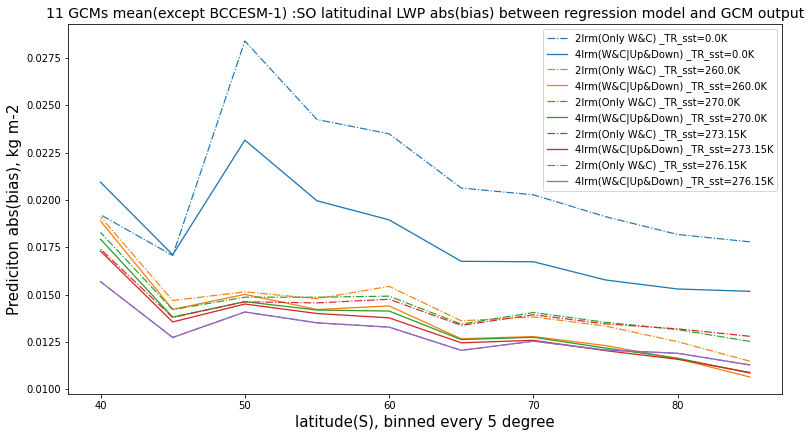

In [51]:
#..Test the LRM performance of latitudinal structure of LWP amount in 'abr' exp

fig = plt.figure(figsize =(12.8, 6.8))
ax  = plt.axes()
my_colors= array([
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()


latitude = arange( 85.,38., -5.)
print(latitude, latitude.shape)

for a in range(len(deck_TR_sst)):
    #ax.plot(latitude, abs(diff_abr_2lrm[deck_nas[1]+'_'+deck_TR_sst[a]+'_'+'lat']), label= '2lrm(Only W&C) _TR_sst='+deck_TR_sst[a]+'K', c=my_colors[2*a-1],linestyle = '-.', linewidth = 1.2)
    #ax.plot(latitude, abs(diff_abr_4lrm[deck_nas[1]+'_'+deck_TR_sst[a]+'_'+'lat']), label= '4lrm(W&C|Up&Down) _TR_sst='+deck_TR_sst[a]+'K', c=my_colors[2*a-1], linestyle = '-', linewidth = 1.3)
    
    ax.plot(latitude, model_mean_bias[deck_TR_sst[a]+'_2lrm_'+'lat'], label= '2lrm(Only W&C) _TR_sst='+deck_TR_sst[a]+'K', c=my_colors[2*a],linestyle = '-.', linewidth = 1.2)
    ax.plot(latitude, model_mean_bias[deck_TR_sst[a]+'_4lrm_'+'lat'], label= '4lrm(W&C|Up&Down) _TR_sst='+deck_TR_sst[a]+'K', c=my_colors[2*a], linestyle = '-', linewidth = 1.3)

ax.legend(loc = 'upper right', fontsize= 10)

plt.xlabel('latitude(S), binned every 5 degree', fontsize =15)
plt.ylabel('Prediciton abs(bias), kg m-2', fontsize=15)

#plt.title(deck_nas[1] +' :SO latitudinal LWP abs(bias) between regression model and GCM output', fontsize = 14)
plt.title('11 GCMs mean(except BCCESM-1) :SO latitudinal LWP abs(bias) between regression model and GCM output', fontsize = 14)

#plt.savefig('Latitudinal Differences: '+ deck_nas[1])
#..plt.savefig('Latitudinal Differences: aver')